In [1]:
import os 
from model import train_tcn, evaluate_tcn
from pathlib import Path

In [4]:
notebook_dir = Path().absolute()

train_file = os.path.join(notebook_dir, "data", "train_x2.h5")
valid_file = os.path.join(notebook_dir, "data", "eval_x2.h5")
scale_factor = 2


In [ ]:
model = train_tcn(
    scale_factor=scale_factor,
    train_file=train_file,  
    valid_file=valid_file, 
    epochs=200,
    batch_size=16,
    patch_size=12,
    save_path="model_x2.pth"
)

In [9]:
import torch
from model import TransposedConvNet
device = "cuda"
model = TransposedConvNet(scale_factor).to(device)
checkpoint = torch.load(
    "/data/zhangxiao/ImageProcess/upsample/TCN/weights/model_x2.pth",
    map_location=device
    )
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

TransposedConvNet(
  (upsample): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import TrainDataset, EvalDataset

eval_dataset = EvalDataset(valid_file)
lr_img, hr_img = eval_dataset[0][0], eval_dataset[0][1]
# lr_tensor = torch.Tensor(lr_img).to(device)
# hr_tensor = torch.Tensor(hr_img).to(device)
# sr_tensor = model(lr_tensor)

# sr_img = sr_tensor.detach().cpu().numpy()
# sr_img.dtype
# sr_img = np.transpose(sr_img, (1,2,0))
# plt.figure(figsize=(10,8))
# plt.imshow(sr_img)
# plt.show()


(3, 678, 1020)

: 

In [6]:
evaluate_tcn(
        model_path="weights/model_x2.pth",
        eval_file="./data/eval_x2.h5",
        scale_factor=scale_factor
    )

Evaluating: 100%|██████████| 100/100 [00:45<00:00,  2.21it/s]

Average Loss: 0.0013
Average PSNR: 30.99dB


(0.0012521697294869227, 30.986382389068602)

In [ ]:
lr_path = '../../asserts/VanGogh.jpg'
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
# img = Image.open(lr_path)

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    # return np.array(image) / 255
    np_image = np.array(image) / 255
    return np_image.astype('float32')

def show(images, titles=None):
    if isinstance(images, np.ndarray):
        images = [images]
    num_img = len(images)
    if isinstance(titles, str):
        titles = [titles] * num_img
    if titles is not None:
        assert len(titles) == len(images), 'Titles length must match images length' 

    fig, axes = plt.subplots(1, num_img, figsize=(3 * num_img, 4))
    if num_img == 1:
        axes = [axes]
    
    for i, (ax, img) in enumerate(zip(axes, images)):
        if len(img.shape) == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)
        
        if titles is not None:
            ax.set_title(titles[i])
    plt.tight_layout() 
    plt.show()

In [ ]:
import torch
from model import TransposedConvNet
model = TransposedConvNet(2)
ckpt = torch.load("weights/model_x2.pth", map_location="cpu")
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

TransposedConvNet(
  (upsample): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)

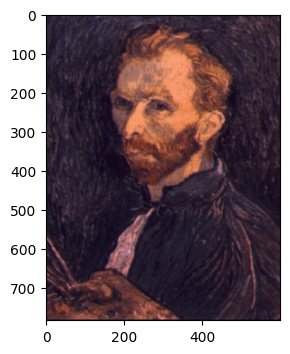

In [ ]:
from torchvision.transforms import ToTensor
img = load_image(lr_path)
show(model(ToTensor()(img)).permute(1,2,0).detach().numpy())

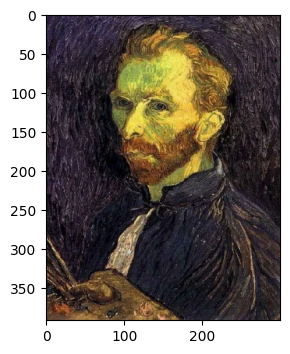

In [ ]:
show(img)